In [1]:
# ====== Packages =======
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

# ---- user defined modules ----
import pre_proccessing_helpers as hel

# This line makes matplotlib plot the figures inside the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 10

## EDA - Exploratory Data Analysis

In [2]:
# 5 first examples from the data

dataset = pd.read_csv("data/Covid Data.csv")
dataset.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
# checking for NULL values and features data type

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
# uniqe values - iterating over all features in dataset using using pandas' value_counts()

hel.check_values_count(dataset)

the different values for USMER:
 2    662903
1    385672
Name: USMER, dtype: int64 

the different values for MEDICAL_UNIT:
 12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64 

the different values for SEX:
 1    525064
2    523511
Name: SEX, dtype: int64 

the different values for PATIENT_TYPE:
 1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64 

the different values for DATE_DIED:
 9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
31/03/2021         1
07/10/2020         1
26/03/2021         1
24/11/2020         1
24/12/2020         1
Name: DATE_DIED, Length: 401, dtype: int64 

the different values for INTUBED:
 97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64 

the different values for PNEUMONIA:
 2     892534
1     14003

In [5]:
# cleaning values  - PARTIALLY

# changing "DATE_DIED" to 0 if patient lived ("9999-99-99") and 1 if died (proper date)
# changing CLASIFFICATION_FINAL to 0 is patient does not have covid (4-7) and 1 if has covid (values 1-3)
# for all other features:
# presenting all non-missing values with {0,1}
# missing values represented with {97,98,99} are left unchanged


dataset.CLASIFFICATION_FINAL = dataset.CLASIFFICATION_FINAL.apply(lambda x: 1 if x < 4 else 0)
dataset.DATE_DIED = dataset.DATE_DIED.apply(lambda x: 0 if x == "9999-99-99" else 1)
dataset.SEX = dataset.SEX.apply(lambda x: x if x == 1 else 0)
dataset.PNEUMONIA = dataset.PNEUMONIA.apply(lambda x: 0 if x == 2 else x)
dataset.PREGNANT = dataset.PREGNANT.apply(lambda x: 0 if x == 2 else x)
dataset.DIABETES = dataset.DIABETES.apply(lambda x: 0 if x == 2 else x)
dataset.COPD = dataset.COPD.apply(lambda x: 0 if x == 2 else x)
dataset.ASTHMA = dataset.ASTHMA.apply(lambda x: 0 if x == 2 else x)
dataset.INMSUPR = dataset.INMSUPR.apply(lambda x: 0 if x == 2 else x)
dataset.HIPERTENSION = dataset.HIPERTENSION.apply(lambda x: 0 if x == 2 else x)
dataset.OTHER_DISEASE = dataset.OTHER_DISEASE.apply(lambda x: 0 if x == 2 else x)
dataset.CARDIOVASCULAR = dataset.CARDIOVASCULAR.apply(lambda x: 0 if x == 2 else x)
dataset.OBESITY = dataset.OBESITY.apply(lambda x: 0 if x == 2 else x)
dataset.RENAL_CHRONIC = dataset.RENAL_CHRONIC.apply(lambda x: 0 if x == 2 else x)
dataset.TOBACCO = dataset.TOBACCO.apply(lambda x: 0 if x == 2 else x)
dataset.ICU = dataset.ICU.apply(lambda x: 0 if x == 2 else x)
dataset.USMER = dataset.USMER.apply(lambda x: 0 if x == 2 else x)
dataset.PATIENT_TYPE = dataset.PATIENT_TYPE.apply(lambda x: 0 if x == 2 else x)
dataset.INTUBED = dataset.INTUBED.apply(lambda x: 0 if x == 2 else x)

In [6]:
# 5 first examples from the pratially cleaned data

dataset.rename(columns={"DATE_DIED": "DIED", "CLASIFFICATION_FINAL" : "COVID"}, inplace=True)
des_column = dataset.pop("DIED")
dataset.insert(20, 'DIED', des_column)

dataset.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID,ICU,DIED
0,0,1,1,1,97,1,65,0,0,0,...,0,1,0,0,0,0,0,1,97,1
1,0,1,0,1,97,1,72,97,0,0,...,0,1,0,0,1,1,0,0,97,1
2,0,1,0,0,1,0,55,97,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,1,1,97,0,53,0,0,0,...,0,0,0,0,0,0,0,0,97,1
4,0,1,0,1,97,0,68,97,1,0,...,0,1,0,0,0,0,0,1,97,1


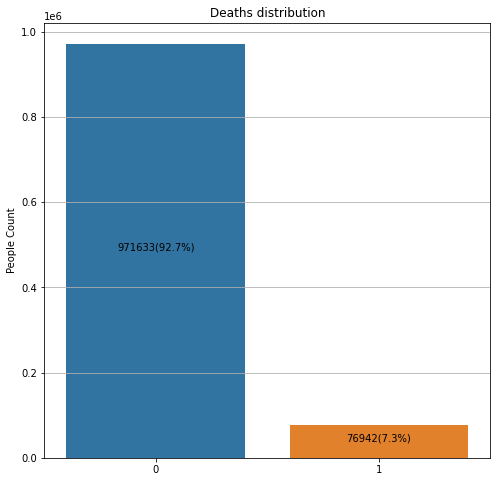

In [7]:
# plotting label distribution

figure, labels = plt.subplots()
sns.barplot(x = dataset['DIED'].value_counts().index, y = dataset['DIED'].value_counts(), ax = labels)
labels.set_ylabel('People Count')
labels.set_title('Deaths distribution')

for patch in labels.patches:
    x_label = patch.get_x() + patch.get_width()/2
    y_label = patch.get_y() + patch.get_height()/2
    labels.text(x_label, y_label, str(int(patch.get_height())) + '(' +  '{:.1%}'.format(patch.get_height()/len(dataset['DIED'])) + ')',
    horizontalalignment='center', verticalalignment='baseline', fontsize = 10)

*** As we can see, the data is imbalanced and will require handling before training

### plotting all features

100%|██████████| 20/20 [00:06<00:00,  3.02it/s]


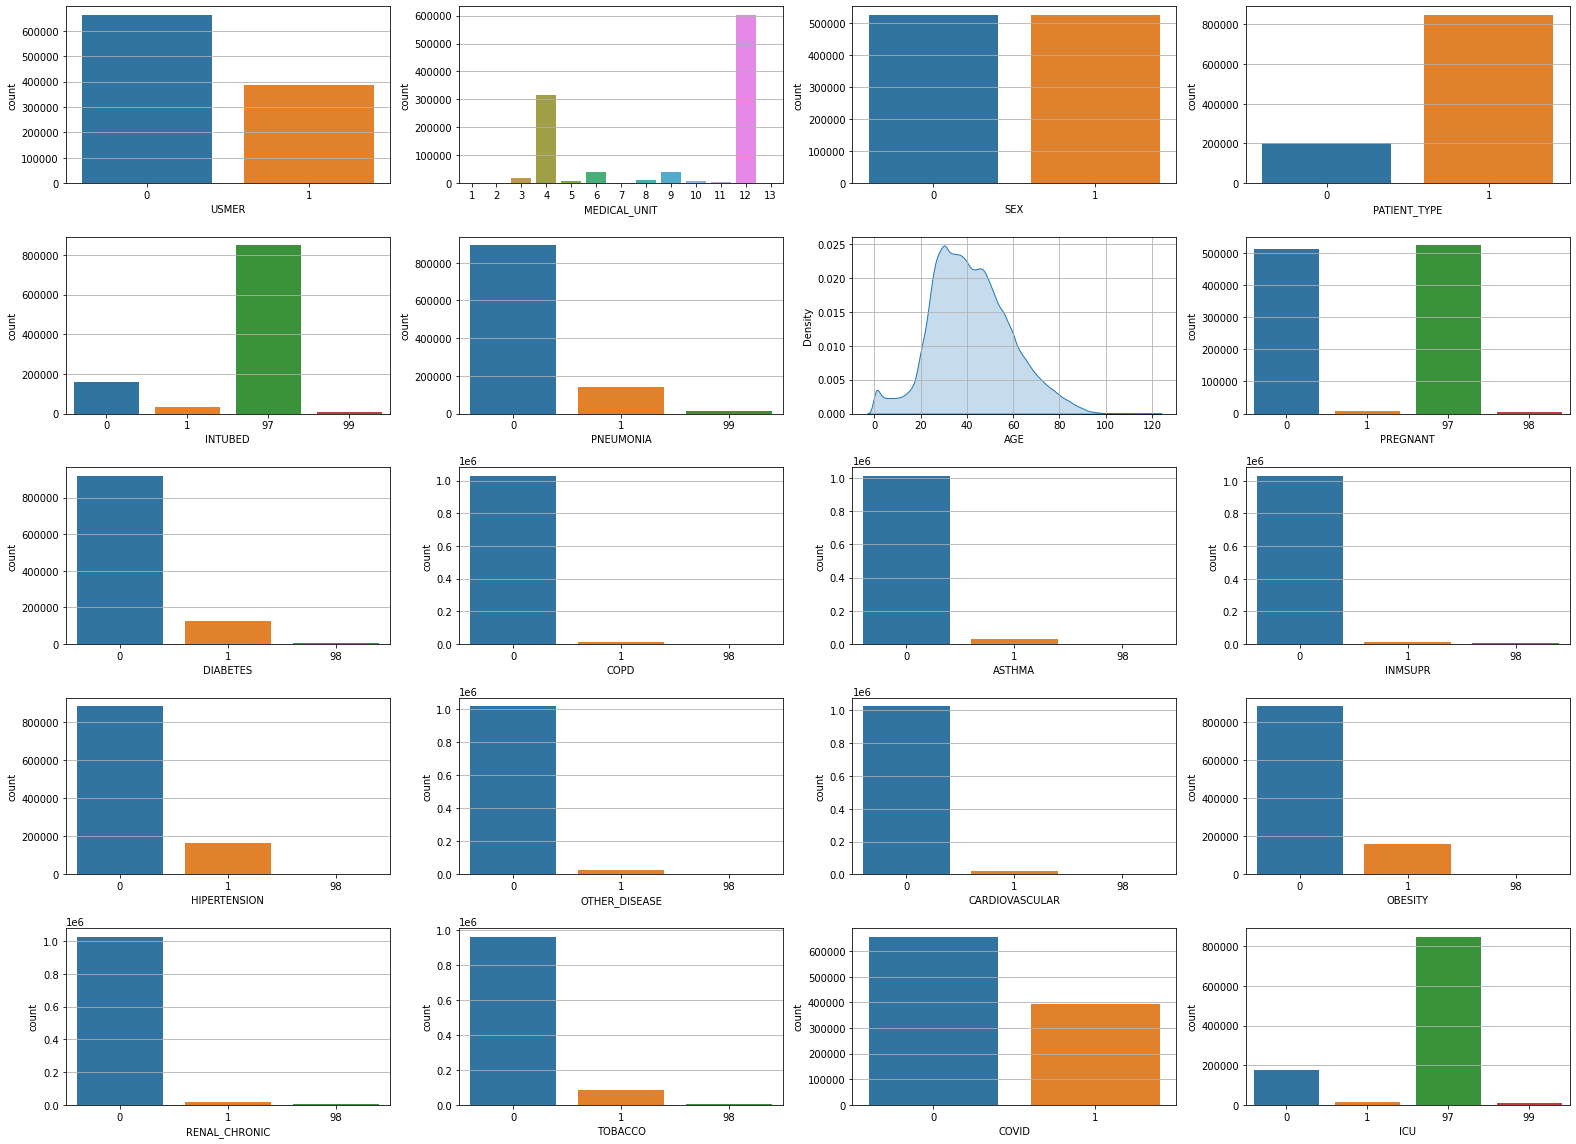

In [8]:
dataset_features_only = dataset.drop(["DIED"], axis=1)
data_plot_count = dataset_features_only.copy(deep=True)

hel.plot_dataset(data_plot_count, sns.countplot, 'countplot')

For the following features, amount of missing values is negligible so we drop those records

In [9]:
dataset = dataset[dataset['PNEUMONIA'] != 99]
dataset = dataset[dataset['COPD'] != 98]
dataset = dataset[dataset['DIABETES'] != 98]
dataset = dataset[dataset['ASTHMA'] != 98]
dataset = dataset[dataset['HIPERTENSION'] != 98]
dataset = dataset[dataset['OTHER_DISEASE'] != 98]
dataset = dataset[dataset['CARDIOVASCULAR'] != 98]
dataset = dataset[dataset['RENAL_CHRONIC'] != 98]
dataset = dataset[dataset['TOBACCO'] != 98]
dataset = dataset[dataset['INMSUPR'] != 98]
dataset = dataset[dataset['OBESITY'] != 98]


In [10]:
# sanity check

hel.check_values_count(dataset)

the different values for USMER:
 0    658255
1    366897
Name: USMER, dtype: int64 

the different values for MEDICAL_UNIT:
 12    591811
4     307177
6      37868
9      37384
3      18660
8      10097
10      7543
5       7062
11      5556
7        871
13       813
2        159
1        151
Name: MEDICAL_UNIT, dtype: int64 

the different values for SEX:
 1    513216
0    511936
Name: SEX, dtype: int64 

the different values for PATIENT_TYPE:
 1    833253
0    191899
Name: PATIENT_TYPE, dtype: int64 

the different values for INTUBED:
 97    833253
0     156712
1      33034
99      2153
Name: INTUBED, dtype: int64 

the different values for PNEUMONIA:
 0    887553
1    137599
Name: PNEUMONIA, dtype: int64 

the different values for AGE:
 30     26548
31     25502
28     24816
29     24681
34     24495
       ...  
118        2
119        2
113        1
111        1
121        1
Name: AGE, Length: 121, dtype: int64 

the different values for PREGNANT:
 97    511936
0     502200
1     

### Handling missing values of the features: 
1. PREGNANT
2. INTUBED
3. ICU

1. PREGNANT:
<br>
this feature has a lot of missing values - around 50% 
<br>
cheking if PREGNANT missing values are correlated to SEX

Text(0.5, 1.0, 'PREGNANT - SEX')

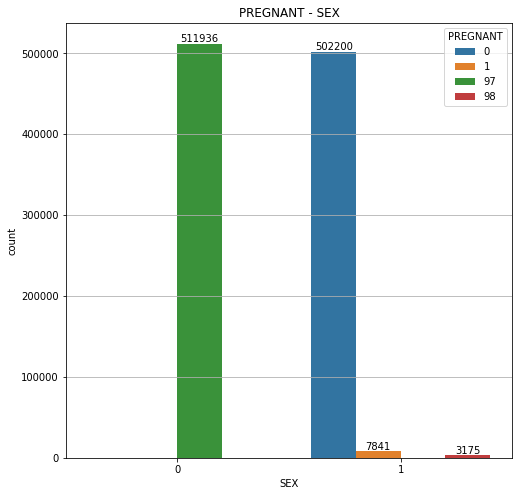

In [11]:
plt.figure()
ax = sns.countplot(x=dataset.SEX, hue = dataset.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANT - SEX")

All men are labeled as 97 for pregnant, therefore 97 will be changed to 0
<br>
Women PREGNANT missing values amount is negligable, so we drop those records

In [12]:
dataset.PREGNANT = dataset.PREGNANT.apply(lambda x: 0 if x == 97 else x)
dataset = dataset[(dataset.PREGNANT == 1) | (dataset.PREGNANT == 0)]

Text(0.5, 1.0, 'PREGNANT - SEX')

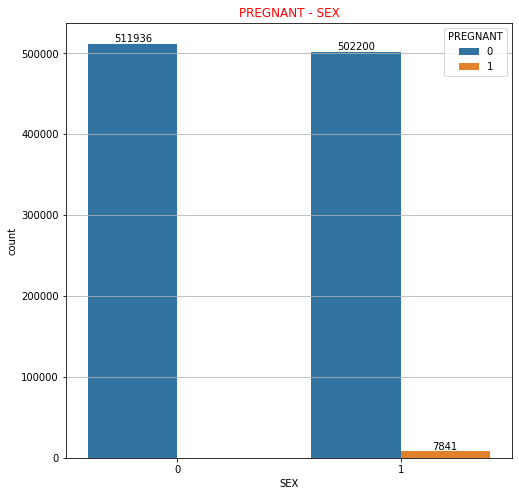

In [13]:
# plotting PREGNANT feature

plt.figure()
ax = sns.countplot(x=dataset.SEX, hue = dataset.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANT - SEX",color="red")

In [14]:
# sanity check
dataset['PREGNANT'].value_counts()

0    1014136
1       7841
Name: PREGNANT, dtype: int64

2. INTUBED:
<br>
most values are missing
<br>
checking for connections to other features

In [15]:
data_by_intubed = dataset.groupby(['INTUBED']).agg(
          USMER = pd.NamedAgg(column="USMER", aggfunc="sum"),
          MEDICAL_UNIT = pd.NamedAgg(column="MEDICAL_UNIT", aggfunc="mean"),
          SEX = pd.NamedAgg(column="SEX", aggfunc="sum"),
          PATIENT_TYPE = pd.NamedAgg(column="PATIENT_TYPE", aggfunc="sum"),
          DIED = pd.NamedAgg(column="DIED", aggfunc="sum"),
          PNEUMONIA = pd.NamedAgg(column="PNEUMONIA", aggfunc="sum"),
          PREGNANT = pd.NamedAgg(column="PREGNANT", aggfunc="sum"),
          DIABETES = pd.NamedAgg(column="DIABETES", aggfunc="sum"),
          ASTHMA = pd.NamedAgg(column="ASTHMA", aggfunc="sum"),
          INMSUPR = pd.NamedAgg(column="INMSUPR", aggfunc="sum"),
          OTHER_DISEASE = pd.NamedAgg(column="OTHER_DISEASE", aggfunc="sum"),
          CARDIOVASCULAR = pd.NamedAgg(column="CARDIOVASCULAR", aggfunc="sum"),
          OBESITY = pd.NamedAgg(column="OBESITY", aggfunc="sum"),
          RENAL_CHRONIC = pd.NamedAgg(column="RENAL_CHRONIC", aggfunc="sum"),
          TOBACCO = pd.NamedAgg(column="TOBACCO", aggfunc="sum"),
          COVID = pd.NamedAgg(column="COVID", aggfunc="sum"),
          HIPERTENSION = pd.NamedAgg(column="HIPERTENSION", aggfunc="sum"),
          )

In [16]:
data_by_intubed

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DIED,PNEUMONIA,PREGNANT,DIABETES,ASTHMA,INMSUPR,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID,HIPERTENSION
INTUBED,,,,,,,,,,,,,,,,,
0,85012,7.405565,65234,0,40759,88452,1696,44421,4015,5543,8799,7579,30345,9160,12859,84879,50035
1,18527,6.912544,11663,0,25891,25251,98,11164,685,1130,2078,1801,7740,2065,2962,23289,12884
97,261208,9.366785,432238,830385,6672,22846,6036,65990,25632,6857,16129,10617,117993,7009,66552,277940,95581
99,1112,9.381793,906,0,1335,814,11,597,84,28,78,89,516,86,165,1488,762


All patients with value 97 in intubed, have value 1 for patient type (patient type 1 returned home - weren't hospitalized)
<br>
Patients who returned home were necessarily not intubed so we'll change the value 97 to 0
<br>
Other missing values amount is negligable, so we drop those records

In [17]:
dataset.INTUBED = dataset.INTUBED.apply(lambda x: 0 if x == 97 else x)
dataset = dataset[dataset['INTUBED'] != 99]

Text(0.5, 1.0, 'INTUBED')

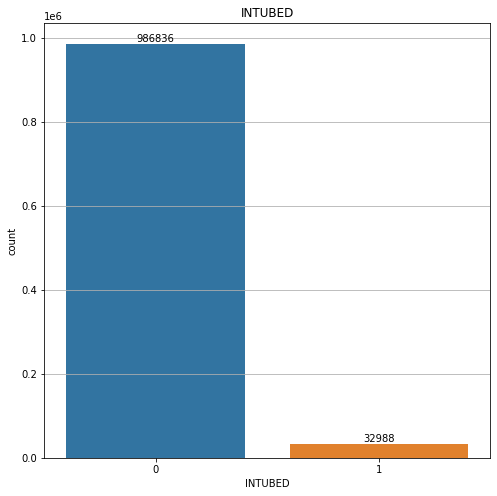

In [18]:
# plotting INTUBED feature

plt.figure()
ax = sns.countplot(x=dataset.INTUBED)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("INTUBED")

In [19]:
# sanity check
dataset['INTUBED'].value_counts()

0    986836
1     32988
Name: INTUBED, dtype: int64

3. ICU:
<br>
most values are missing
<br>
checking for connections to other features

In [20]:
data_by_ICU = dataset.groupby(['ICU']).agg(
          USMER = pd.NamedAgg(column="USMER", aggfunc="sum"),
          MEDICAL_UNIT = pd.NamedAgg(column="MEDICAL_UNIT", aggfunc="mean"),
          SEX = pd.NamedAgg(column="SEX", aggfunc="sum"),
          PATIENT_TYPE = pd.NamedAgg(column="PATIENT_TYPE", aggfunc="sum"),
          DIED = pd.NamedAgg(column="DIED", aggfunc="sum"),
          PNEUMONIA = pd.NamedAgg(column="PNEUMONIA", aggfunc="sum"),
          PREGNANT = pd.NamedAgg(column="PREGNANT", aggfunc="sum"),
          DIABETES = pd.NamedAgg(column="DIABETES", aggfunc="sum"),
          ASTHMA = pd.NamedAgg(column="ASTHMA", aggfunc="sum"),
          INMSUPR = pd.NamedAgg(column="INMSUPR", aggfunc="sum"),
          OTHER_DISEASE = pd.NamedAgg(column="OTHER_DISEASE", aggfunc="sum"),
          CARDIOVASCULAR = pd.NamedAgg(column="CARDIOVASCULAR", aggfunc="sum"),
          OBESITY = pd.NamedAgg(column="OBESITY", aggfunc="sum"),
          RENAL_CHRONIC = pd.NamedAgg(column="RENAL_CHRONIC", aggfunc="sum"),
          TOBACCO = pd.NamedAgg(column="TOBACCO", aggfunc="sum"),
          COVID = pd.NamedAgg(column="COVID", aggfunc="sum"),
          HIPERTENSION = pd.NamedAgg(column="HIPERTENSION", aggfunc="sum"),
          )

In [21]:
data_by_ICU

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DIED,PNEUMONIA,PREGNANT,DIABETES,ASTHMA,INMSUPR,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID,HIPERTENSION
ICU,,,,,,,,,,,,,,,,,
0,95370,7.112597,70847,0,58697,100021,1629,50534,4320,6031,9911,8405,33979,10402,14431,97955,57429
1,8012,9.470868,5985,0,7941,13545,163,5005,377,635,956,967,4080,809,1376,10205,5449
97,261208,9.366785,432238,830385,6672,22846,6036,65990,25632,6857,16129,10617,117993,7009,66552,277940,95581
99,157,10.537975,65,0,12,137,2,46,3,7,10,8,26,14,14,8,41


As we've seen in INTUBED feature, patients who returned home are not in ICU
<br>
Other values amount is negligable

In [22]:
dataset.INTUBED = dataset.INTUBED.apply(lambda x: 0 if x == 97 else x)
dataset = dataset[dataset['INTUBED'] != 99]

In [23]:
dataset.ICU = dataset.ICU.apply(lambda x: 0 if x == 97 else x)
dataset = dataset[dataset['ICU'] != 99]

Text(0.5, 1.0, 'ICU')

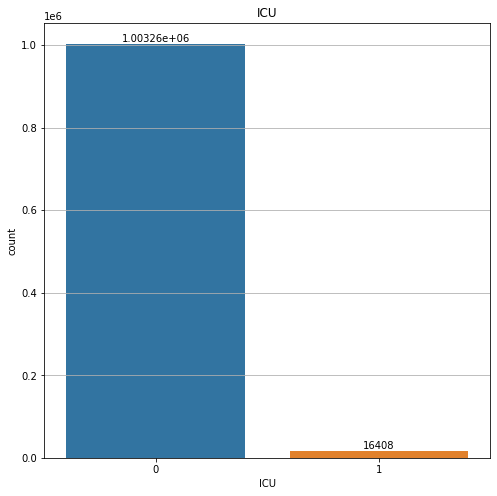

In [24]:
# plotting ICU feature

plt.figure()
ax = sns.countplot(x=dataset.ICU)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("ICU")

In [25]:
# sanity check
dataset['ICU'].value_counts()

0    1003258
1      16408
Name: ICU, dtype: int64

### Checking for correlation between all features

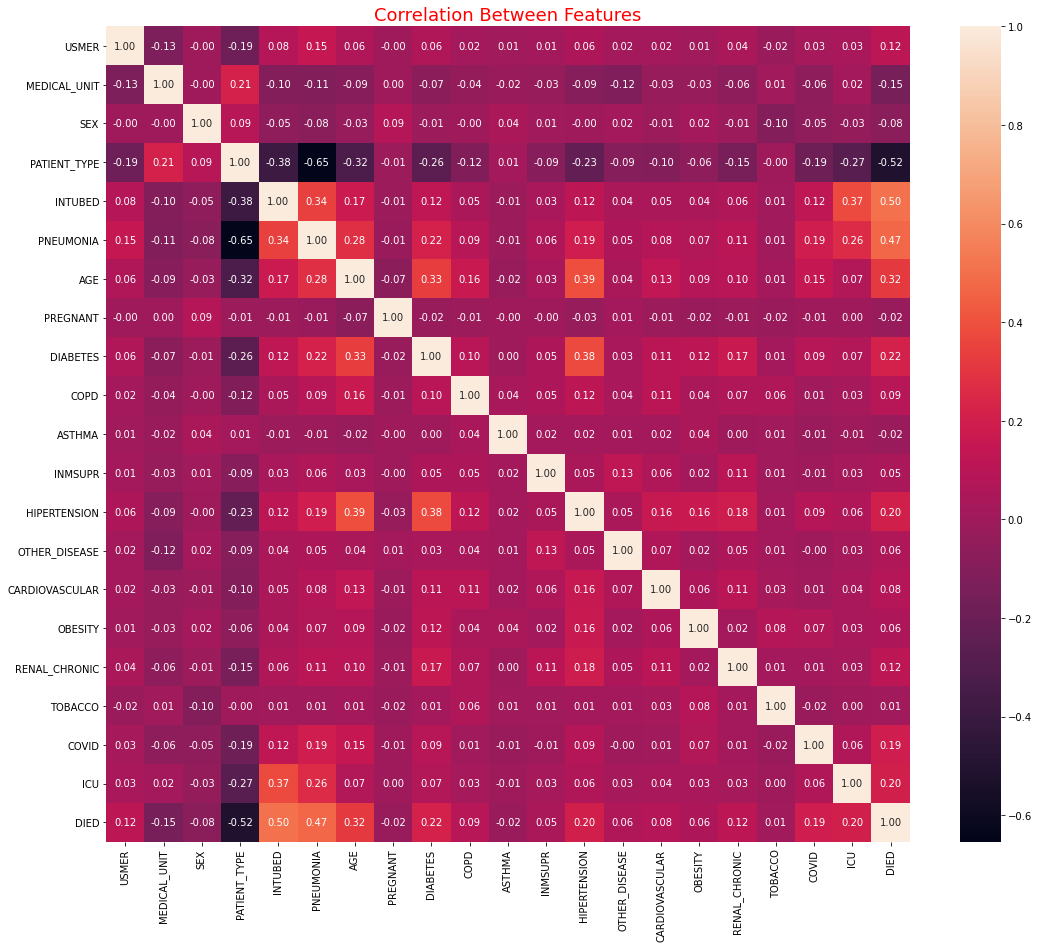

In [26]:
plt.figure(figsize=(18,15))
sns.heatmap(dataset.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

#### Handling AGE and MEDICAL_UNIT

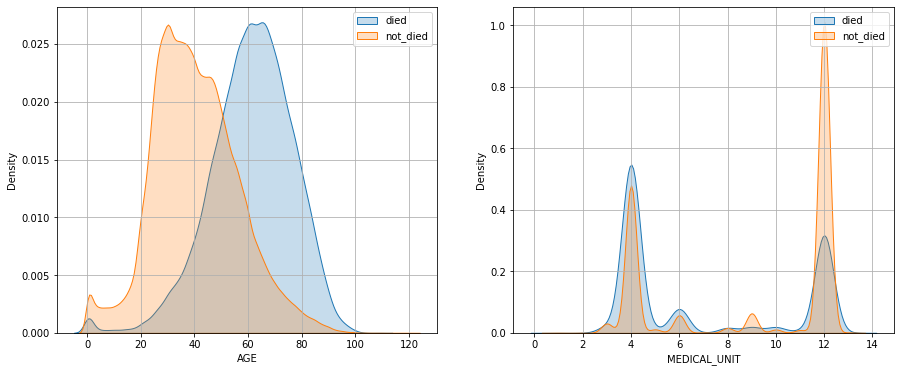

In [27]:
# converting the features to binary features
# checking for best threshold to binarize by

died = dataset[dataset['DIED']==1]
not_died = dataset[dataset['DIED']==0]

fig,ax = plt.subplots(1,2,figsize=(15, 6))
sns.kdeplot(data=died, x='AGE', fill=True,ax=ax[0], label='died')
sns.kdeplot(data=not_died, x='AGE', fill=True,ax=ax[0], label='not_died')
ax[0].legend()


sns.kdeplot(data=died, x='MEDICAL_UNIT', fill=True,ax=ax[1], label='died')
sns.kdeplot(data=not_died, x='MEDICAL_UNIT', fill=True,ax=ax[1], label='not_died')
ax[1].legend()


In [28]:
# applying thresholding

dataset.AGE = dataset.AGE.apply(lambda x: 0 if x < 56 else 1)
dataset.MEDICAL_UNIT = dataset.MEDICAL_UNIT.apply(lambda x: 1 if x in (12,9) else 0)

## Final Results

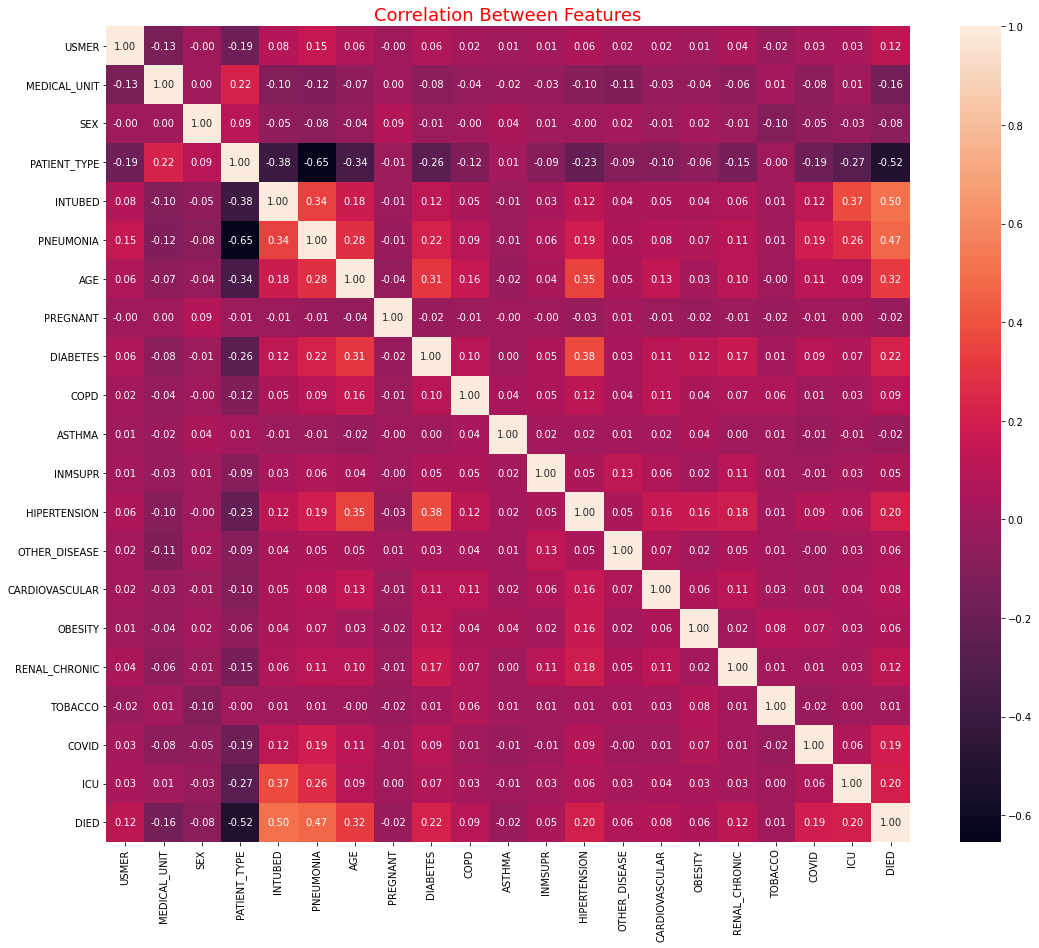

In [29]:
plt.figure(figsize=(18,15))
sns.heatmap(dataset.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

100%|██████████| 20/20 [00:04<00:00,  4.16it/s]


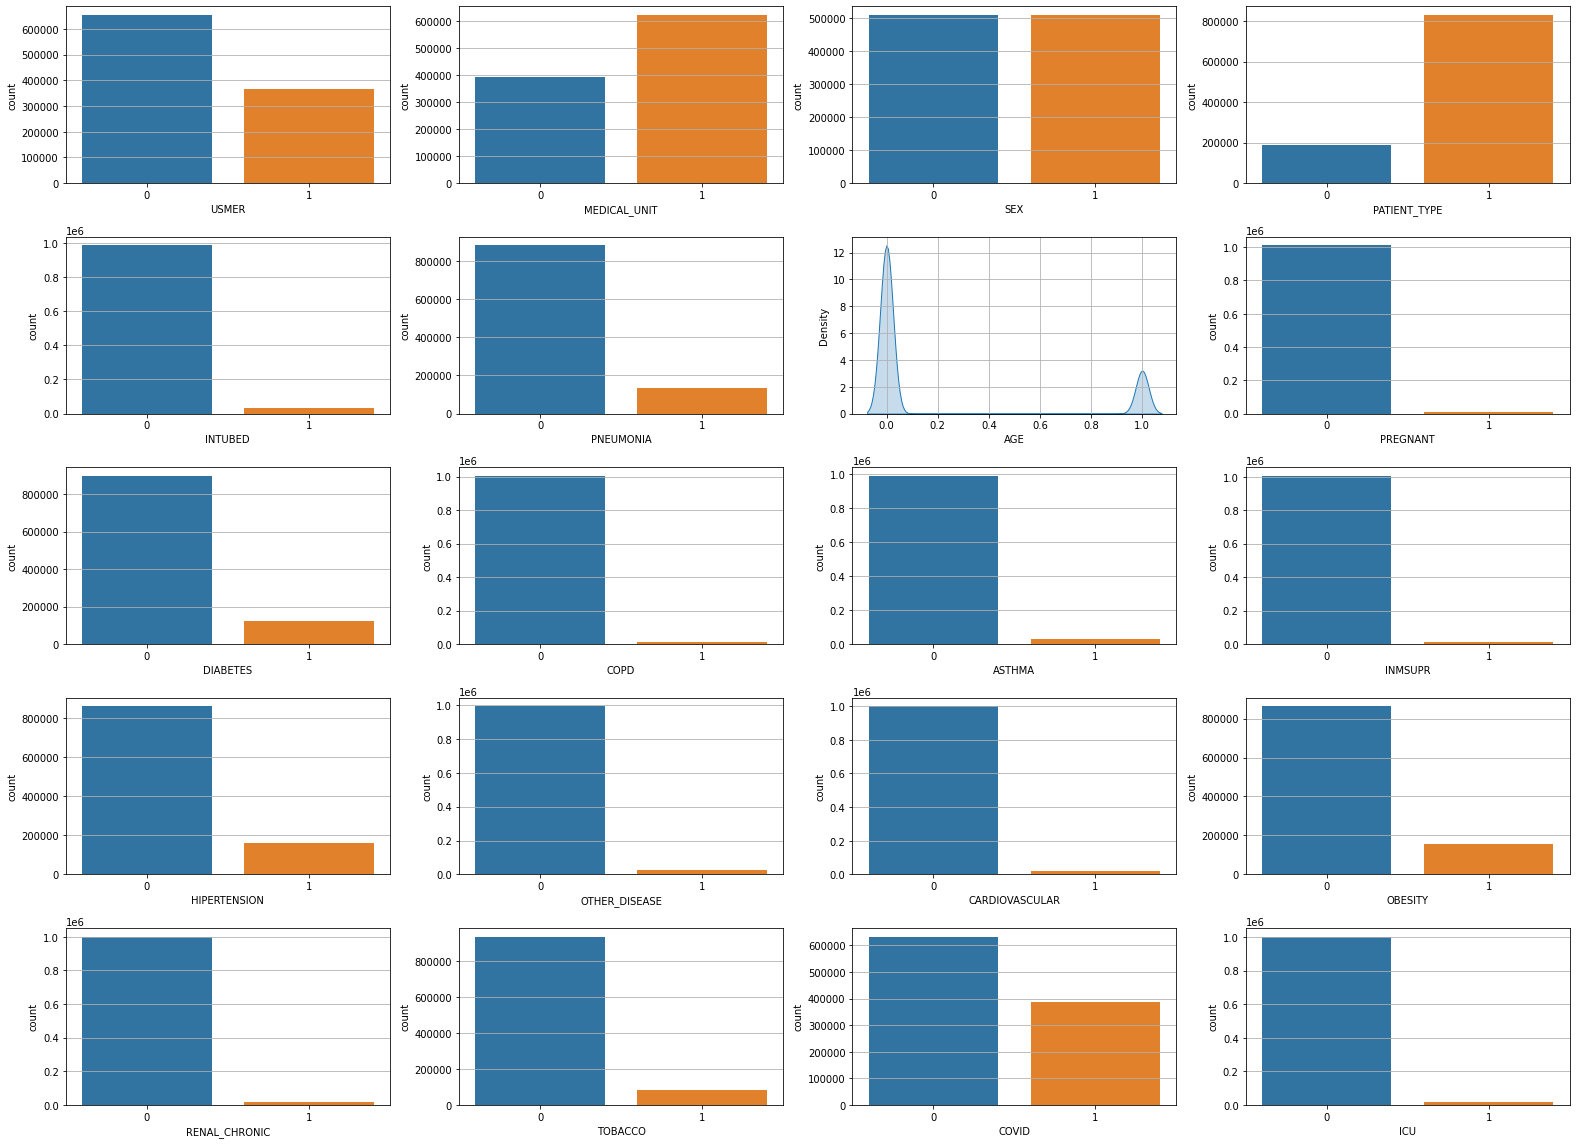

In [30]:
dataset_features_only = dataset.drop(["DIED"], axis=1)
data_plot_count = dataset_features_only.copy(deep=True)

hel.plot_dataset(data_plot_count, sns.countplot, 'countplot')

In [31]:
# saving processed data

#dataset.to_csv('data/preprocessed_data.csv', index=False)